# Bird Image Model

In [2]:
#Define the folder where you saved the data in
path = "C:\\Users\\arice\\OneDrive\\Documents\\Chitter_ML data\\_final_bird_images\\"

# **Model**

Importing stuff to make sure the models work

In [10]:
#basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#for images
from sklearn.utils import shuffle
from sklearn.decomposition import PCA

#Model
from sklearn.neighbors import KNeighborsClassifier

#Model selection
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

Assigning Data for Birds

In [20]:
#Defining X_train y_train
train_path = path+"train\\" #labeling the path of where the train data is
X_train = []  #creating a list for the images
y_train = []  #creating the labels

#go through every bird in every species
for species in os.listdir(train_path):
    folder_path = os.path.join(train_path, species) 
    for bird_image in os.listdir(folder_path):
        img_path = os.path.join(folder_path, bird_image)
        img = mpimg.imread(img_path)
        X_train.append(img)
        y_train.append(species)

X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

print(X_train_np.shape) #output dimensions (number of images,pixels_x,pixels_y,rgb)
print(y_train_np.shape) #output dimensions (number of images,)


(3654, 224, 224, 3)
(3654,)


In [23]:
#Defining X_test y_test
test_path = path+"test\\" #labeling the path of where the valiadtion data is
X_test = []  #creating a list for the images
y_test = []  #creating the labels

#go through every bird in every species
for species in os.listdir(test_path):
    folder_path = os.path.join(test_path, species) 
    for bird_image in os.listdir(folder_path):
        img_path = os.path.join(folder_path, bird_image)
        img = mpimg.imread(img_path)
        X_test.append(img)
        y_test.append(species)

X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

print(X_test_np.shape) #output dimensions (number of images,pixels_x,pixels_y,rgb)
print(y_test_np.shape) #output dimensions (number of images,)


(130, 224, 224, 3)
(130,)


In [24]:
#Defining X_valid y_valid
valid_path = path+"validation\\" #labeling the path of where the valiadtion data is
X_valid = []  #creating a list for the images
y_valid = []  #creating the labels

#go through every bird in every species
for species in os.listdir(valid_path):
    folder_path = os.path.join(valid_path, species) 
    for bird_image in os.listdir(folder_path):
        img_path = os.path.join(folder_path, bird_image)
        img = mpimg.imread(img_path)
        X_valid.append(img)
        y_valid.append(species)

X_valid_np = np.array(X_valid)
y_valid_np = np.array(y_valid)

print(X_valid_np.shape) #output dimensions (number of images,pixels_x,pixels_y,rgb)
print(y_valid_np.shape) #output dimensions (number of images,)

(130, 224, 224, 3)
(130,)


BAR-TAILED GODWIT


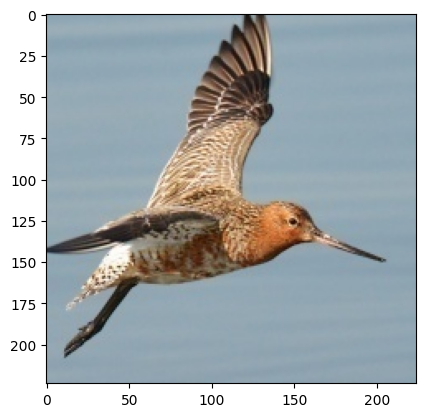

In [25]:
img_train = X_train_np[0]
plt.imshow(img_train)
print(y_train_np[0])

BAR-TAILED GODWIT


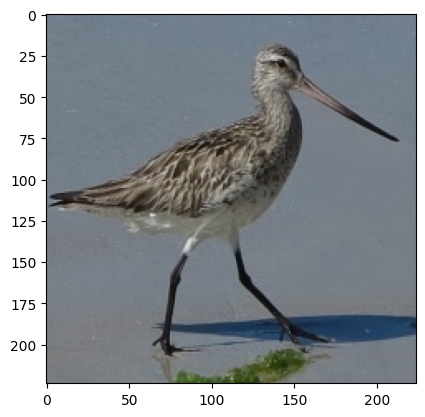

In [26]:
img_test = X_test_np[0]
plt.imshow(img_test)
print(y_test_np[0])

BAR-TAILED GODWIT


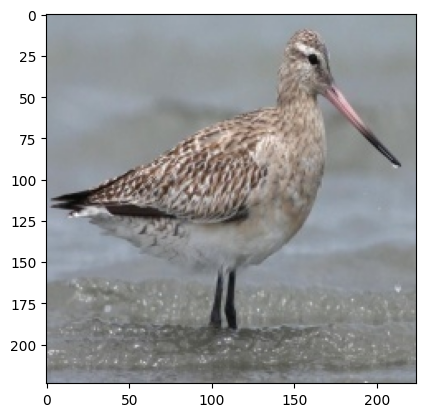

In [22]:
img_valid = X_valid_np[0]
plt.imshow(img_valid)
print(y_valid_np[0])

PCA on Bird Images

In [ ]:
#Implementing PCA
n_components = 10    ###!NEEDS TO BE CHANGED!
pca = PCA(n_components=n_components).fit(X_train_np)
#pca1 = pca.fit(X_train_C)
X_train_pca = pca.transform(X_train_np)
X_test_pca = pca.transform(X_test_np)

# Percentage of variance explained for the sum of each component
print('explained variance ratio with n_components =', n_components ,': %s' % str(sum(pca.explained_variance_ratio_)))

#print(X_train_C.shape,X_pca_train.shape)


Creating a simple model for Bird Images

In [ ]:
#Model creation and selection
param = {'n_neighbors':[1, 2, 5, 9]}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param, cv=5)
grid_search_knn.fit(X_train_pca, y_train)

#Find the best hyperparameter
print("Best parameters: {}".format(grid_search_knn.best_params_))

Running the simple model for Bird Images

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9).fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)

Evaluating the simple model for Bird Images

In [ ]:
#evaluation metrics
print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred_knn)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred_knn)))
print("Weighted f1-score:", f1_score(y_test, y_pred_knn, average='weighted'))